<a href="https://colab.research.google.com/github/rinkeshdas01/Bike-Rental-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Regression
##### **Contribution -**  - Individual
##### **Team Member 1 -** - Rinkesh Das
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary**

**Problem Statement**- Currently rental bikes are introduced in many urban cities to enhance mobility comfort. It is important ot make rental bikes available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

The project involves the following steps:-

1.	Understanding of Business Objective
2.	Data Cleaning
3.	EDA
4.	Model Training and Implementation
5.	Model Evaluation and Validation

After performing all the steps above, the following conclusions were obtained:-

•	Linear Regression and Ridge Regression did not give us satisfactory results. They performed bad on both train and test data.

•	Decision Tree Regressor performed very well on train data but not so well on test data. This suggests that the model was overfitting on the train data.

•	XG Boost Regressor and Random Forest Regressor performed well on both the train and test data. But out of the two, XG Boost performed better. It gave us an Adjusted R2 score of 0.94 which is very good.

•	So we chose XG Boost regressor as the optimum model for our problem


Write the summary here within 500-600 words.

# **GitHub Link -**

 https://github.com/rinkeshdas01/Bike-Rental-Demand-Prediction

# **Problem Statement**


**Currently rental bikes are introduced in many urban cities to enhance mobility comfort. It is important ot make rental bikes available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
import lightgbm as lgb
import missingno as msno

### Dataset Loading

In [ ]:
#Load Dataset
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path='/content/drive/MyDrive/Bike Sharing Demand Prediction/SeoulBikeData.csv'

In [ ]:
df=pd.read_csv(path, encoding= 'unicode_escape')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(8760, 14)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

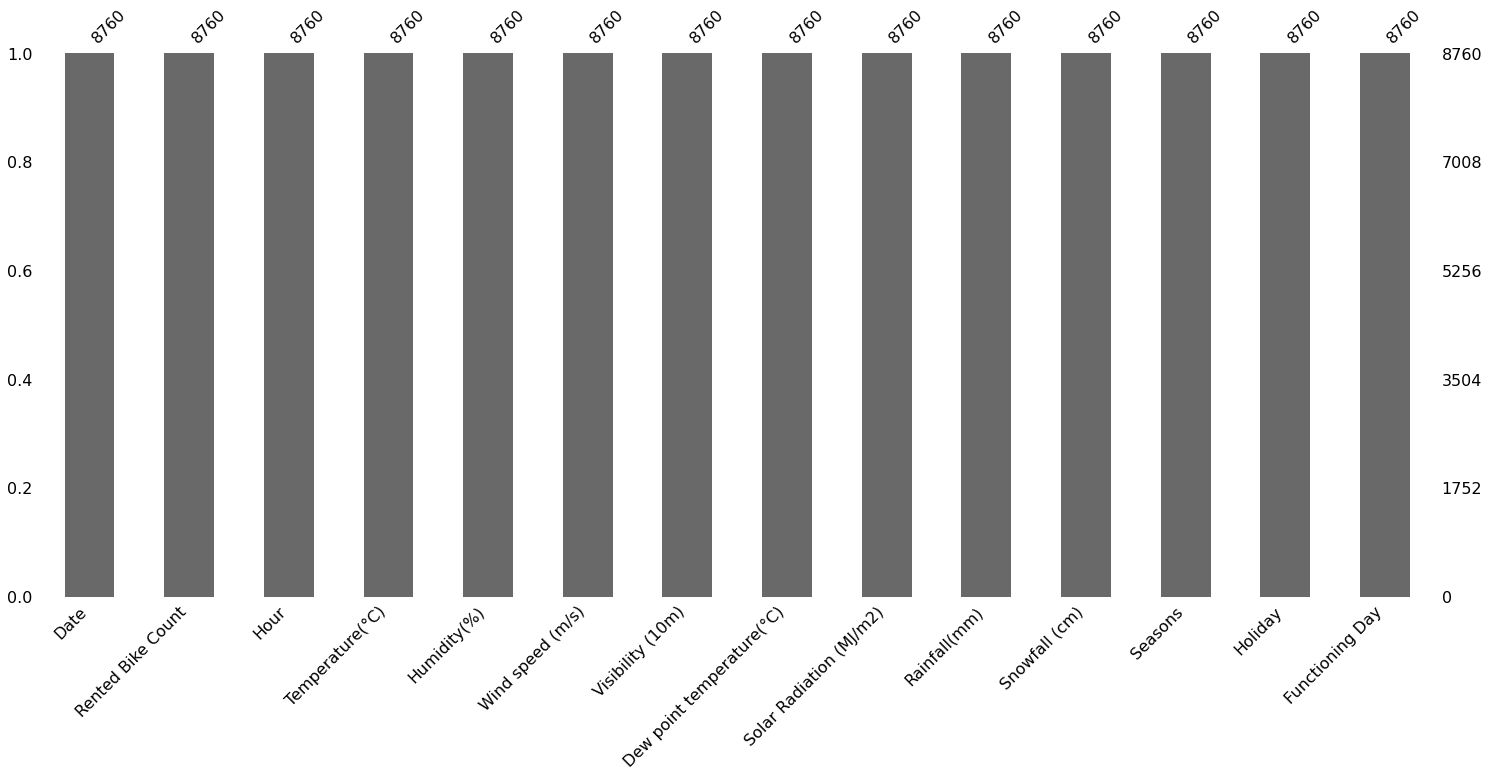

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(5,5))
msno.bar(df)

### What did you know about your dataset?

The dataset contains 8760 rows and 14 columns.

Out of these 10 are numerical features, 3 are categorical features and 1 is datetime features.

There are no null and duplicate values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Variables Description 


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
#Define a function to check the unique values for each variable
def unique_val(data,variables):
  for i in variables:
    print(data[i].unique())
    
    print("The number of unique values in",i,"is :  ",len(data[i].unique()))
    print('\n')

In [ ]:
variables=list(df.columns)
unique_val(df,variables)

['01/12/2017' '02/12/2017' '03/12/2017' '04/12/2017' '05/12/2017'
 '06/12/2017' '07/12/2017' '08/12/2017' '09/12/2017' '10/12/2017'
 '11/12/2017' '12/12/2017' '13/12/2017' '14/12/2017' '15/12/2017'
 '16/12/2017' '17/12/2017' '18/12/2017' '19/12/2017' '20/12/2017'
 '21/12/2017' '22/12/2017' '23/12/2017' '24/12/2017' '25/12/2017'
 '26/12/2017' '27/12/2017' '28/12/2017' '29/12/2017' '30/12/2017'
 '31/12/2017' '01/01/2018' '02/01/2018' '03/01/2018' '04/01/2018'
 '05/01/2018' '06/01/2018' '07/01/2018' '08/01/2018' '09/01/2018'
 '10/01/2018' '11/01/2018' '12/01/2018' '13/01/2018' '14/01/2018'
 '15/01/2018' '16/01/2018' '17/01/2018' '18/01/2018' '19/01/2018'
 '20/01/2018' '21/01/2018' '22/01/2018' '23/01/2018' '24/01/2018'
 '25/01/2018' '26/01/2018' '27/01/2018' '28/01/2018' '29/01/2018'
 '30/01/2018' '31/01/2018' '01/02/2018' '02/02/2018' '03/02/2018'
 '04/02/2018' '05/02/2018' '06/02/2018' '07/02/2018' '08/02/2018'
 '09/02/2018' '10/02/2018' '11/02/2018' '12/02/2018' '13/02/2018'
 '14/02/20

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.


In [ ]:
df['Average of temp and DP temp']=df[['Temperature(°C)','Dew point temperature(°C)']].mean(axis=1)

The variables Temperature and Dew Point Temperature are no longer required.

In [ ]:
#Dropping dew point temperature
df.drop(['Temperature(°C)','Dew point temperature(°C)'],axis=1,inplace=True)

We can extract day month and year from the Date variable.

In [ ]:
#Converting the Date column to datetime format
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
#Extracting month from date
date_list=list(df['Date'])
month=[i.month for i in date_list]
len(month)

8760

In [ ]:
#Extracting weekday from date
weekday=[i.weekday() for i in date_list]


In [ ]:
#Assigning month names to the months
month_names_list=['None','Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec']
month_names=[j for i in month for j in month_names_list if i==month_names_list.index(j)]


In [ ]:
#Assigning weekday names to weekday
day_name_list=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
day_names=[j for i in weekday for j in day_name_list if i==day_name_list.index(j)]
len(day_names)

8760

In [ ]:
df['Day of Week']=day_names
df['Month']=month_names
df['Month']

0       Jan
1       Jan
2       Jan
3       Jan
4       Jan
       ... 
8755    Nov
8756    Nov
8757    Nov
8758    Nov
8759    Nov
Name: Month, Length: 8760, dtype: object

### What all manipulations have you done and insights you found?

Dew point temperature is related to temperature by the following relation:-

Td=T-((100-RH)/5)  where,

Td= Dew point Temperature

T= Observed Temperarure

RH=Relative Humidity


So a new variable was introduced in order to reduce correlation.

Also, day, weekday, month, year were extracted from the date column.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Relationship between Rented Bike Count and Temperature

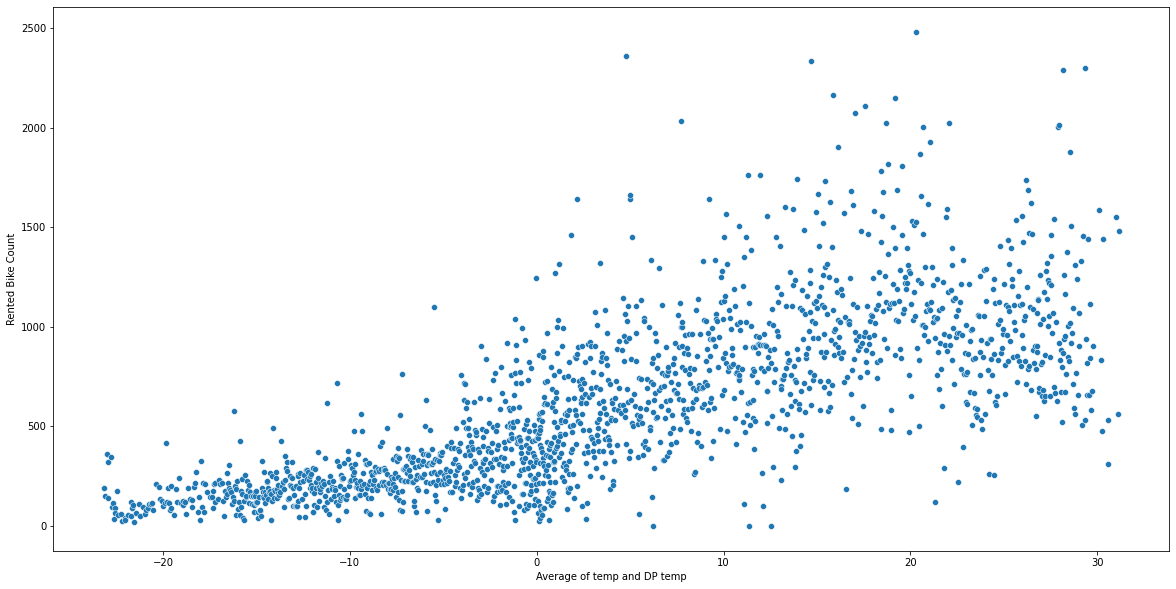

In [ ]:
# Chart - 1 visualization code
#Observing the variation of the demand wrt Temperature
tempdf=df.groupby(['Average of temp and DP temp'],as_index=False)['Rented Bike Count'].mean()
plt.figure(figsize=(20,10))
sns.scatterplot(data=tempdf,x='Average of temp and DP temp',y='Rented Bike Count')

##### 1. Why did you pick the specific chart?

To understand how temperature influences the bike renting business.

##### 2. What is/are the insight(s) found from the chart?

It is observed that when the temperature is optimal i.e. around 30 degree celsius, more number of bikes are rented.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

Relationship between Rented Bike Count and Rainfall

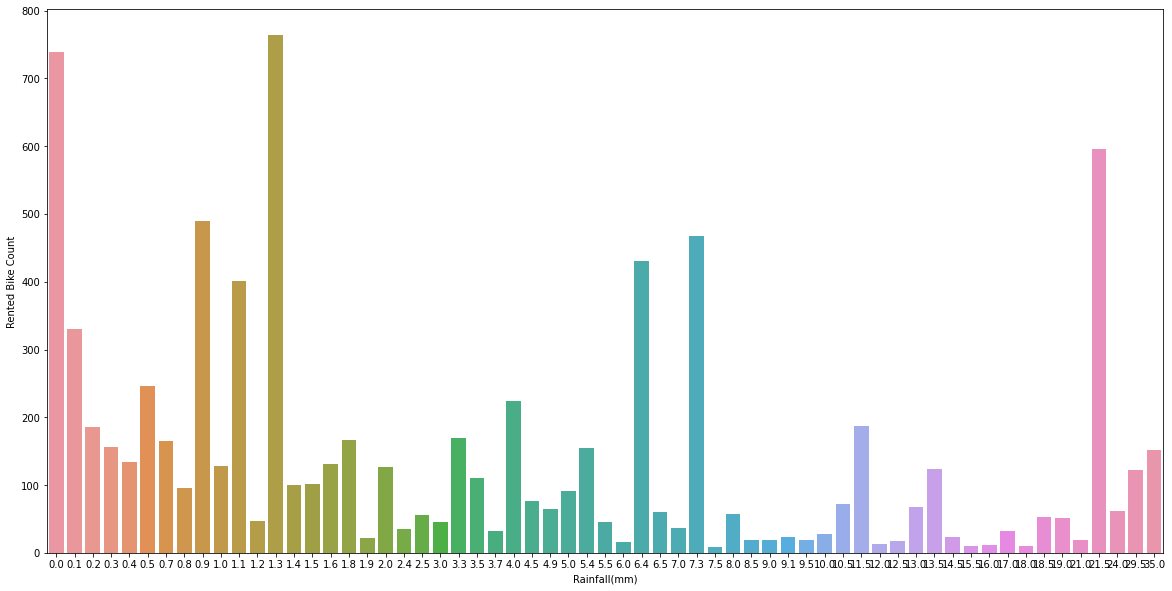

In [ ]:
# Chart - 2 visualization code
#Observing the variation of the demand wrt Rainfall
raindf=df.groupby(['Rainfall(mm)'],as_index=False)['Rented Bike Count'].mean()
plt.figure(figsize=(20,10))
sns.barplot(data=raindf,x='Rainfall(mm)',y='Rented Bike Count')

##### 1. Why did you pick the specific chart?

To understand the influence of rainfall on Rented Bike Count.

##### 2. What is/are the insight(s) found from the chart?

It is observed that most number of bikes are rented when there is no rainfall.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

Relationship between Rented Bike Count and Snowfall

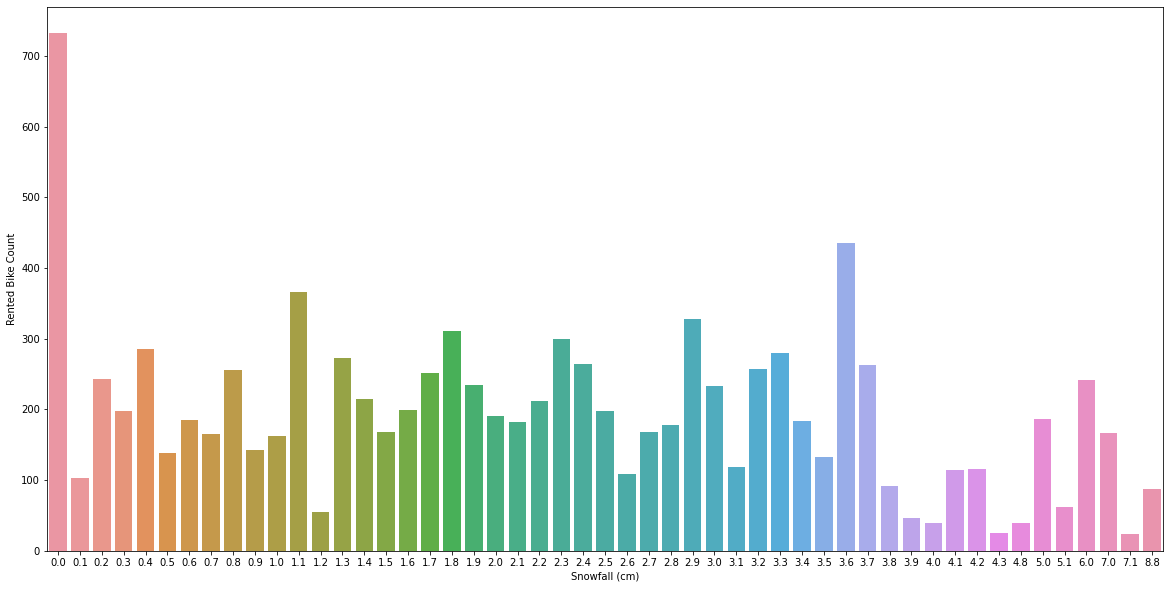

In [ ]:
# Chart - 3 visualization code
#Observing the variation of the demand wrt Snowfall
snowdf=df.groupby(['Snowfall (cm)'],as_index=False)['Rented Bike Count'].mean()
plt.figure(figsize=(20,10))
sns.barplot(data=snowdf,x='Snowfall (cm)',y='Rented Bike Count')

##### 1. Why did you pick the specific chart?

To understand the influence of Snowfall on the number of bikes rented.

##### 2. What is/are the insight(s) found from the chart?

It is observed that more number of bikes are rented when there is no snowfall.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

Relationship between Rented Bike Count and Humidity

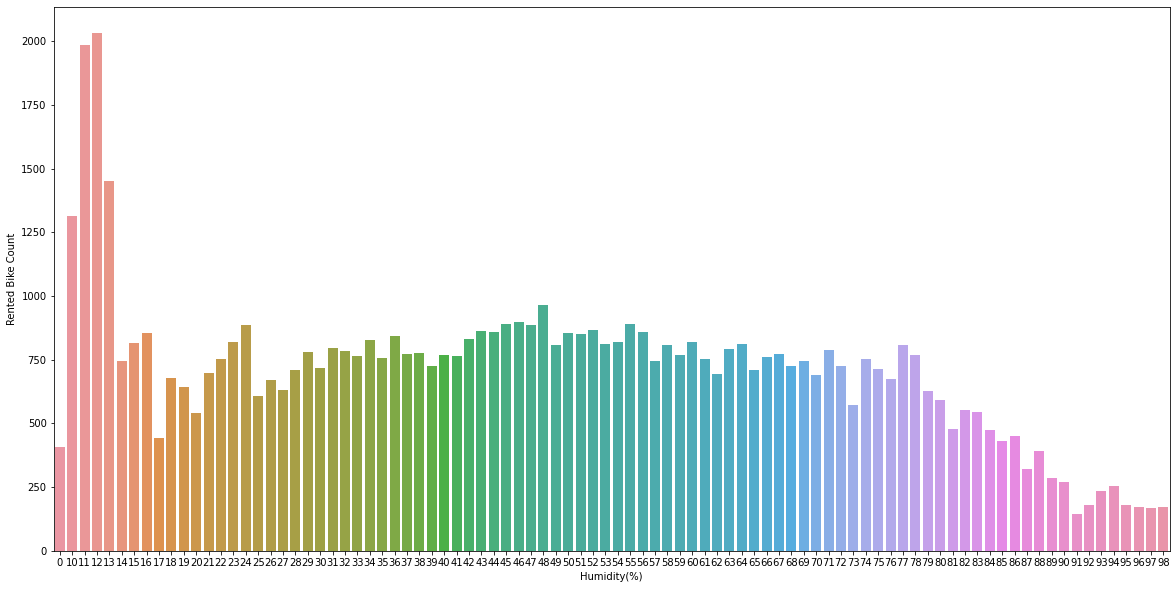

In [ ]:
# Chart - 4 visualization code
#Observing the variation of the demand wrt Humidity
humdf=df.groupby(['Humidity(%)'],as_index=False)['Rented Bike Count'].mean()
plt.figure(figsize=(20,10))
sns.barplot(data=humdf,x='Humidity(%)',y='Rented Bike Count')

##### 1. Why did you pick the specific chart?

To understand the influence of Humidity on the number of bikes rented.

##### 2. What is/are the insight(s) found from the chart?

It is observed that more number of bikes are rented when there is less humidity.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

 Rented Bike Count w.r.t. different seasons 

Text(0.5, 1.0, 'Bikes rented in different seasons')

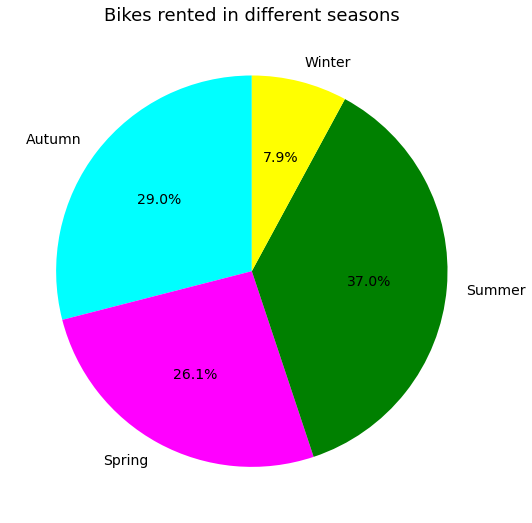

In [ ]:
# Chart - 5 visualization code
df_season=df.groupby('Seasons',as_index=False)['Rented Bike Count'].sum()
df_season
#Fixing the size of the pie chart
plt.rcParams['figure.figsize']=9,9
#Converting labels and values into list form
labels=df_season['Seasons']
values=df_season['Rented Bike Count']

#Choosing colors for the piechart
colors=['cyan','magenta','green','yellow']
#choosing spacing between the sections of the piechart
explode=(0,0,0,0)
plt.pie(values,labels=labels,explode=explode,colors=colors,autopct='%1.1f%%',startangle=90, textprops={'fontsize':14})
plt.title('Bikes rented in different seasons', fontsize=18)

##### 1. Why did you pick the specific chart?

To understand the distribution of the number of bikes rented among all the seasons.

##### 2. What is/are the insight(s) found from the chart?

It is seen that the highest number of bikes is rented in Summer and the lowest in winter.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

 Rented Bike Count throughout the week 

Text(0.5, 1.0, 'Bikes rented in different days of week')

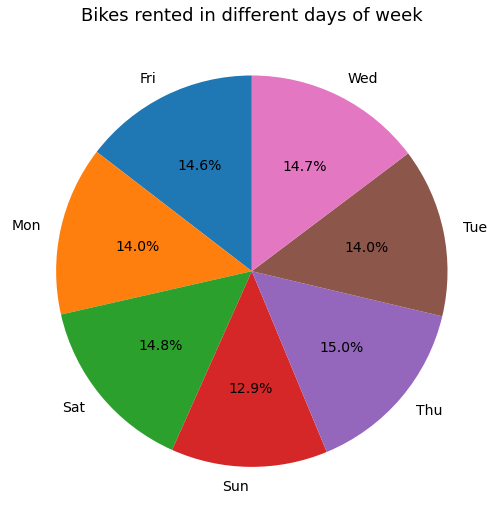

In [ ]:
# Chart - 6 visualization code
df_dow=df.groupby('Day of Week',as_index=False)['Rented Bike Count'].sum()
#Fixing the size of the pie chart
plt.rcParams['figure.figsize']=9,9
#Converting labels and values into list form
labels=df_dow['Day of Week']
values=df_dow['Rented Bike Count']
plt.pie(values,labels=labels,autopct='%1.1f%%',startangle=90, textprops={'fontsize':14})
plt.title('Bikes rented in different days of week', fontsize=18)

##### 1. Why did you pick the specific chart?

To understand the distribution of the number of bikes rented throughout the week.

##### 2. What is/are the insight(s) found from the chart?

It is observed that the highest number of bikes are rented in Thursday and the lowest on Sunday.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

 Rented Bike Count throughout the year

Text(0.5, 1.0, 'Bikes rented in different months of the year')

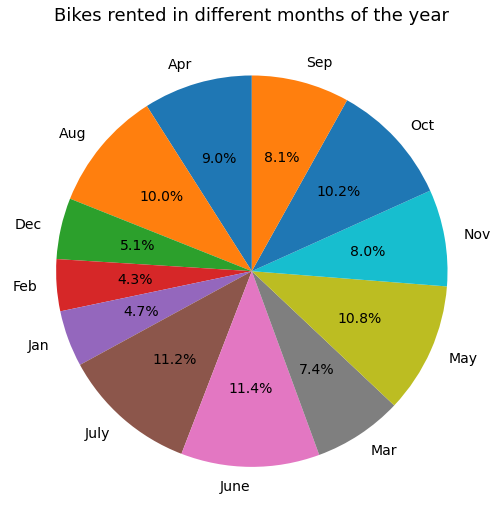

In [ ]:
# Chart - 7 visualization code
df_mn=df.groupby('Month',as_index=False)['Rented Bike Count'].sum()
#Fixing the size of the pie chart
plt.rcParams['figure.figsize']=9,9
#Converting labels and values into list form
labels=df_mn['Month']
values=df_mn['Rented Bike Count']
plt.pie(values,labels=labels,autopct='%1.1f%%',startangle=90, textprops={'fontsize':14})
plt.title('Bikes rented in different months of the year', fontsize=18)

##### 1. Why did you pick the specific chart?

To understand the distribution of the number of bikes rented throughout the year.

##### 2. What is/are the insight(s) found from the chart?

It is observed that the highest number of bikes are rented in June and the lowest in February.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

 Rented Bike Count w.r.t Holidays

Text(0.5, 1.0, 'Bikes rented in Holidays')

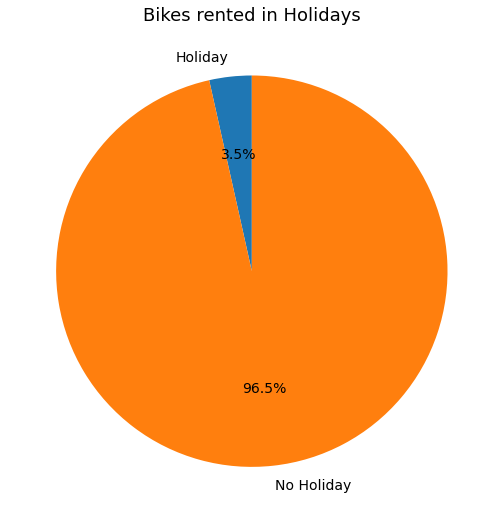

In [ ]:
# Chart - 8 visualization code
df_hol=df.groupby('Holiday',as_index=False)['Rented Bike Count'].sum()
#Fixing the size of the pie chart
plt.rcParams['figure.figsize']=9,9
#Converting labels and values into list form
labels=df_hol['Holiday']
values=df_hol['Rented Bike Count']
plt.pie(values,labels=labels,autopct='%1.1f%%',startangle=90, textprops={'fontsize':14})
plt.title('Bikes rented in Holidays', fontsize=18)

##### 1. Why did you pick the specific chart?

To observe the number of bikes rented on days when there is a holiday and when there is no holiday.

##### 2. What is/are the insight(s) found from the chart?

Most of the bikes are rented when there is no holiday.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

 Rented Bike Count w.r.t functioning and non functioning days

Text(0.5, 1.0, 'Bikes rented in Functioning and Non Functioning Days')

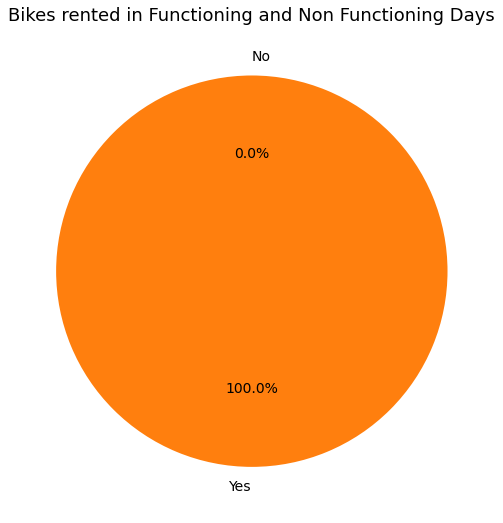

In [ ]:
# Chart - 9 visualization code
df_fn=df.groupby('Functioning Day',as_index=False)['Rented Bike Count'].sum()
#Fixing the size of the pie chart
plt.rcParams['figure.figsize']=9,9
#Converting labels and values into list form
labels=df_fn['Functioning Day']
values=df_fn['Rented Bike Count']
plt.pie(values,labels=labels,autopct='%1.1f%%',startangle=90, textprops={'fontsize':14})
plt.title('Bikes rented in Functioning and Non Functioning Days', fontsize=18)

##### 1. Why did you pick the specific chart?

To observe the number of rented bikes during functioning and non-Functioning day

##### 2. What is/are the insight(s) found from the chart?

All the bikes are rented on functioning days.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

 Rented Bike Count throughout the day

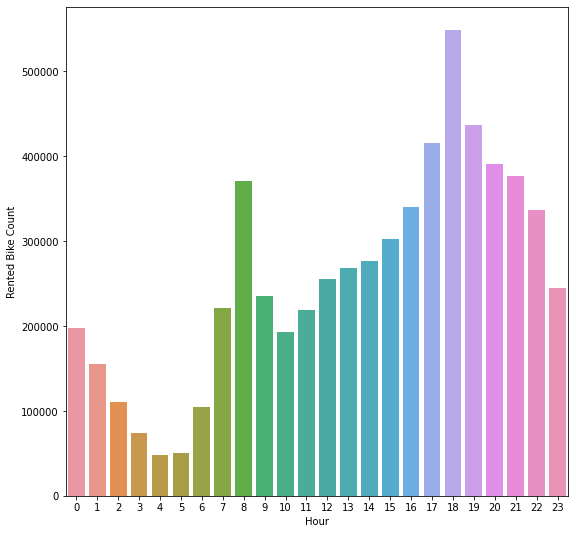

In [ ]:
# Chart - 10 visualization code
df_hr=df.groupby('Hour',as_index=False)['Rented Bike Count'].sum()
sns.barplot(data=df_hr,x='Hour',y='Rented Bike Count')

##### 1. Why did you pick the specific chart?

To observe the number of bikes rented with respect to different hours of the day

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

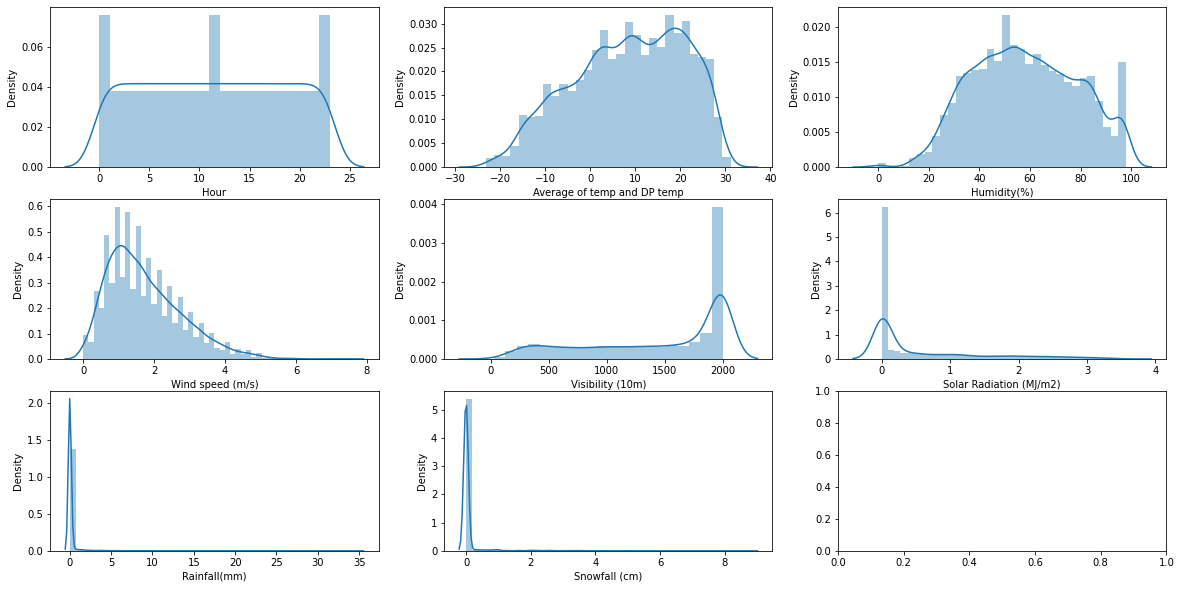

In [ ]:
# Chart - 11 visualization code
#Looking at the distribution plots for various variables
fig,axes=plt.subplots(3,3,figsize=(20,10))
sns.distplot(df['Hour'],kde=True,ax=axes[0,0])
sns.distplot(df['Average of temp and DP temp'],kde=True,ax=axes[0,1])
sns.distplot(df['Humidity(%)'],kde=True,ax=axes[0,2])
sns.distplot(df['Wind speed (m/s)'],kde=True,ax=axes[1,0])
sns.distplot(df['Visibility (10m)'],kde=True,ax=axes[1,1])
sns.distplot(df['Solar Radiation (MJ/m2)'],kde=True,ax=axes[1,2])
sns.distplot(df['Rainfall(mm)'],kde=True,ax=axes[2,0])
sns.distplot(df['Snowfall (cm)'],kde=True,ax=axes[2,1])

##### 1. Why did you pick the specific chart?

To observe the distributions of the variables

##### 2. What is/are the insight(s) found from the chart?

Most of the data are left or right skewed.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

 Rented Bike Count w.r.t visibility

In [ ]:
#Converting the visibility into different categories
vis_list=list(df['Visibility (10m)'])
vis_cat=['Very Low' if i>=0 and i<500 else 'Low' if i>=500 and i<1000 else 'Medium' if i>=1000 and i<1500 else 'High' if i>=1500 and i<2000 else 'Very High' for i in vis_list] 
df['Visibility Category']=vis_cat

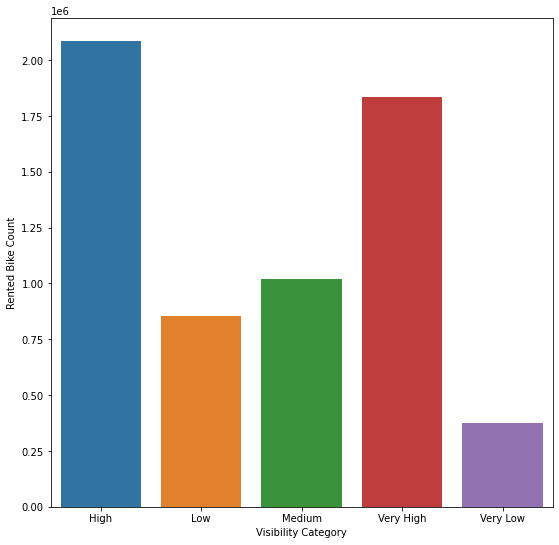

In [ ]:
# Chart - 12 visualization code
df_vis=df.groupby('Visibility Category',as_index=False)['Rented Bike Count'].sum()
sns.barplot(data=df_vis,x='Visibility Category',y='Rented Bike Count')

##### 1. Why did you pick the specific chart?

To understand the influence of visibility on the number of bikes rented.

##### 2. What is/are the insight(s) found from the chart?

More number of bikes are rented when the visibility is either high or very high. Thus Rented bike count seems to have a positive correlation with visibility.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13 - Correlation Heatmap

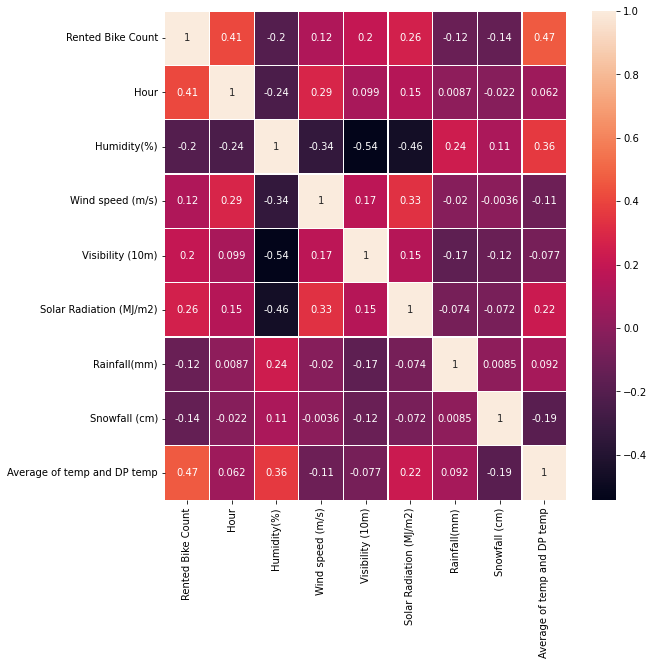

In [ ]:
# Correlation Heatmap visualization code
sns.heatmap(df.corr(method='pearson'),annot=True,linewidths=0.2)

##### 1. Why did you pick the specific chart?

To observe the correlation among the variables.

##### 2. What is/are the insight(s) found from the chart?

Most of the variables have low correlation and some have moderate correlation.

#### Chart - 14 - Pair Plot 

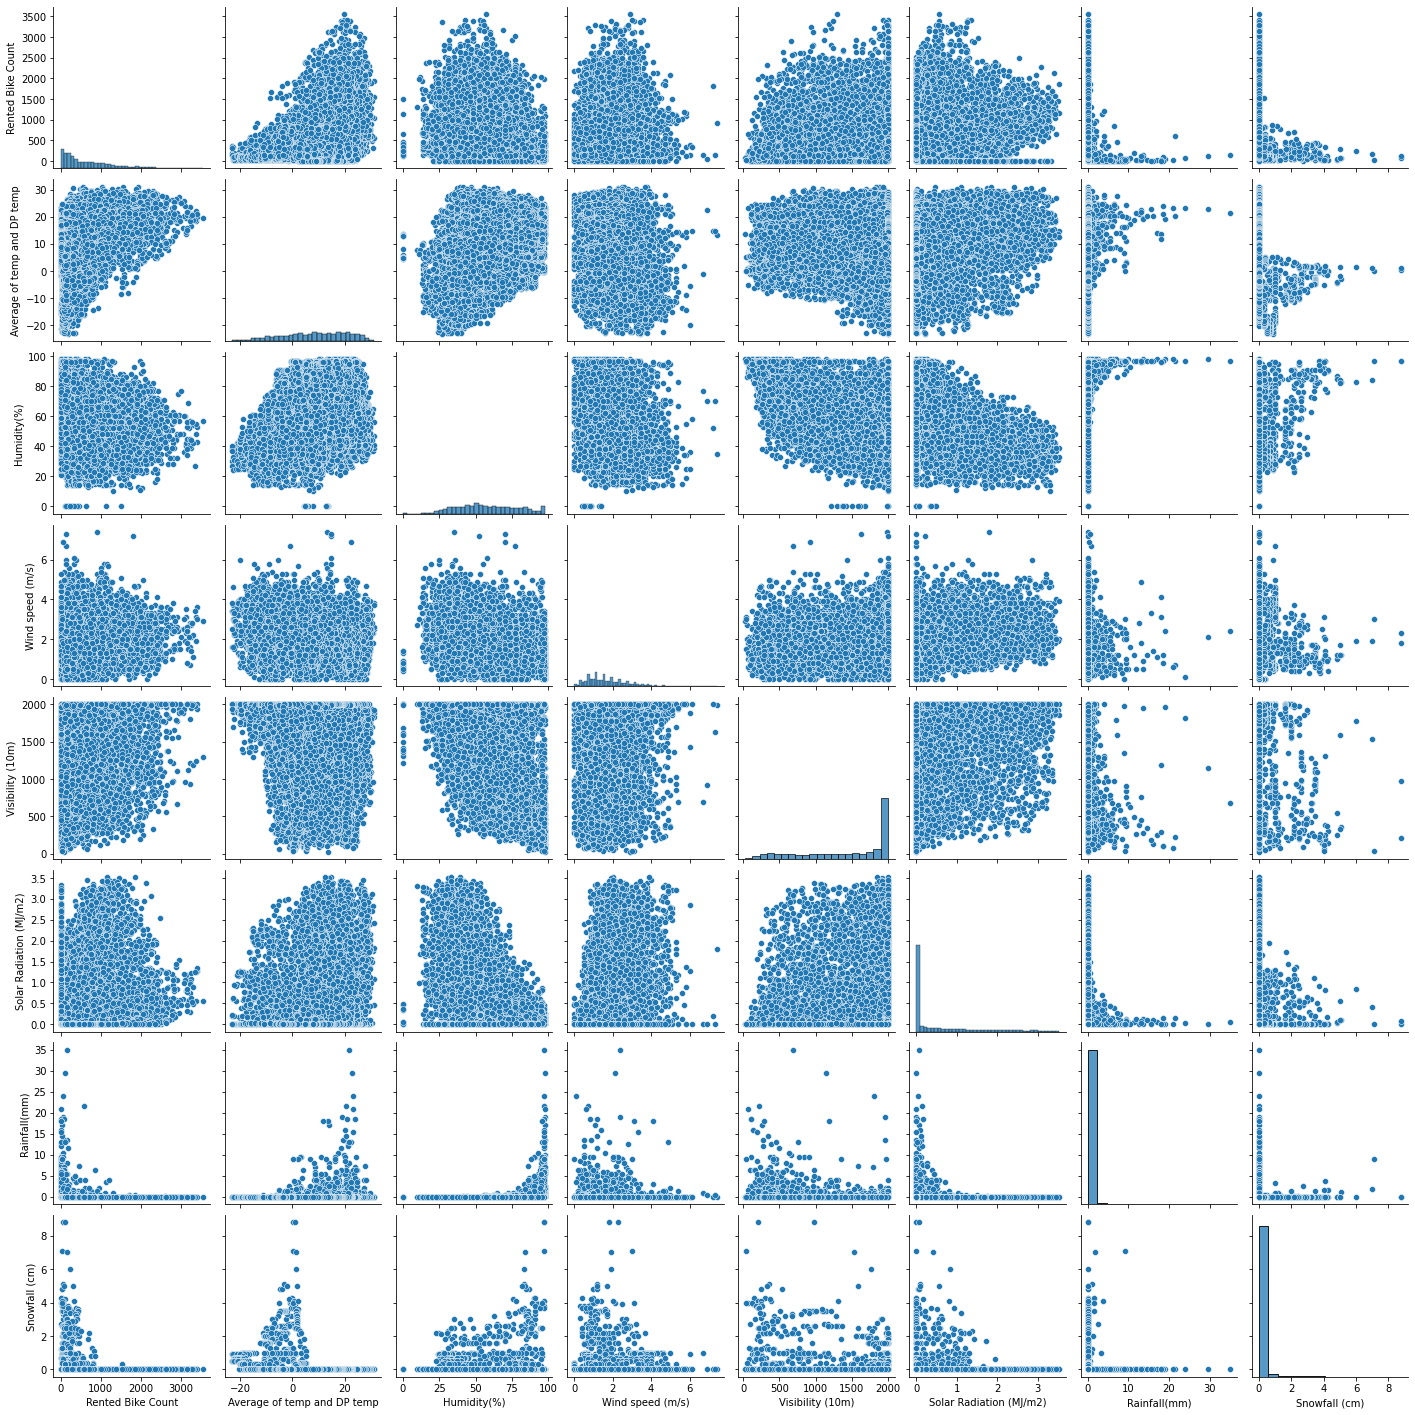

In [ ]:
# Pair Plot visualization code
sns.pairplot(data=df,kind='scatter',vars=['Rented Bike Count','Average of temp and DP temp','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)'])

##### 1. Why did you pick the specific chart?

To understand the relationship between some selected variables.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Feature Engineering & Data Pre-processing***

In [ ]:
#No bikes are rented on non functional day so it is not needed
df=df[(df['Functioning Day']=='Yes')]
df.drop('Functioning Day',axis=1,inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# There are no null values in the dataset

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

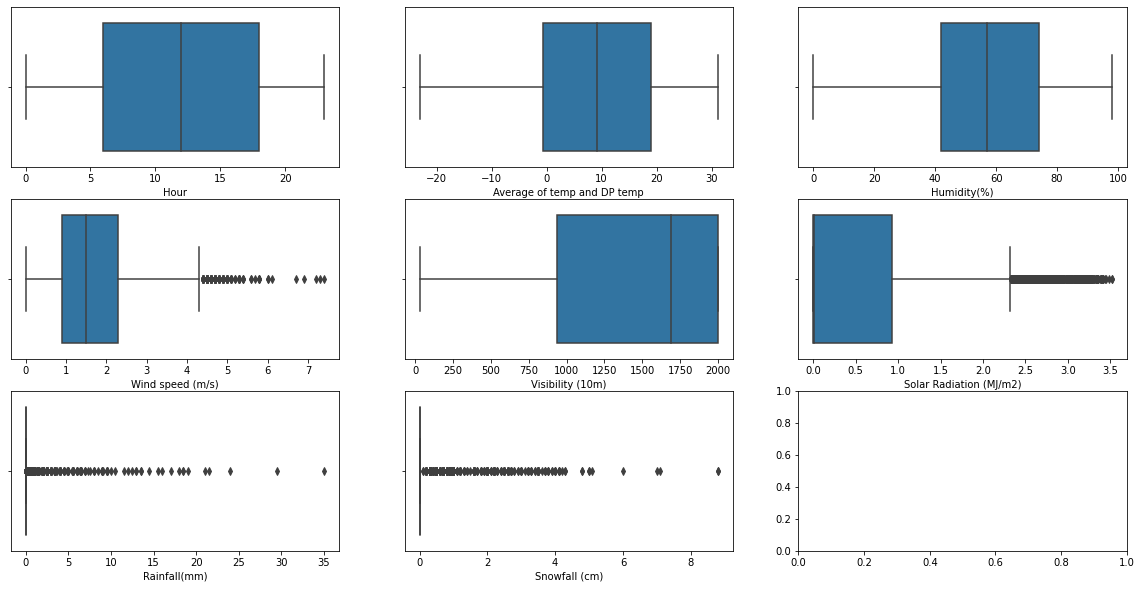

In [ ]:
# Handling Outliers & Outlier treatments
#Looking at the box plots for various variables to observe outliers
fig,axes=plt.subplots(3,3,figsize=(20,10))
sns.boxplot(df['Hour'],ax=axes[0,0])
sns.boxplot(df['Average of temp and DP temp'],ax=axes[0,1])
sns.boxplot(df['Humidity(%)'],ax=axes[0,2])
sns.boxplot(df['Wind speed (m/s)'],ax=axes[1,0])
sns.boxplot(df['Visibility (10m)'],ax=axes[1,1])
sns.boxplot(df['Solar Radiation (MJ/m2)'],ax=axes[1,2])
sns.boxplot(df['Rainfall(mm)'],ax=axes[2,0])
sns.boxplot(df['Snowfall (cm)'],ax=axes[2,1])

In [ ]:
Q1=df['Wind speed (m/s)'].quantile(0.25)
Q3=df['Wind speed (m/s)'].quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
lower_limit,upper_limit

(-1.1999999999999997, 4.3999999999999995)

In [ ]:
df=df[(df['Wind speed (m/s)']>lower_limit)&(df['Wind speed (m/s)']<upper_limit)]

In [ ]:
Q1_SR=df['Solar Radiation (MJ/m2)'].quantile(0.25)
Q3_SR=df['Solar Radiation (MJ/m2)'].quantile(0.75)
IQR_SR=Q3_SR-Q1_SR
lower_limit_SR=Q1_SR-1.5*IQR_SR
upper_limit_SR=Q3_SR+1.5*IQR_SR
lower_limit_SR,upper_limit_SR

(-1.35, 2.25)

In [ ]:
df=df[(df['Solar Radiation (MJ/m2)']>lower_limit_SR)&(df['Solar Radiation (MJ/m2)']<upper_limit_SR)]

In [ ]:
Q1_R=df['Rainfall(mm)'].quantile(0.25)
Q3_R=df['Rainfall(mm)'].quantile(0.75)
IQR_R=Q3_R-Q1_R
lower_limit_R=Q1_R-1.5*IQR_R
upper_limit_R=Q3_R+1.5*IQR_R
lower_limit_R,upper_limit_R

(0.0, 0.0)

In [ ]:
df.shape


(7638, 15)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

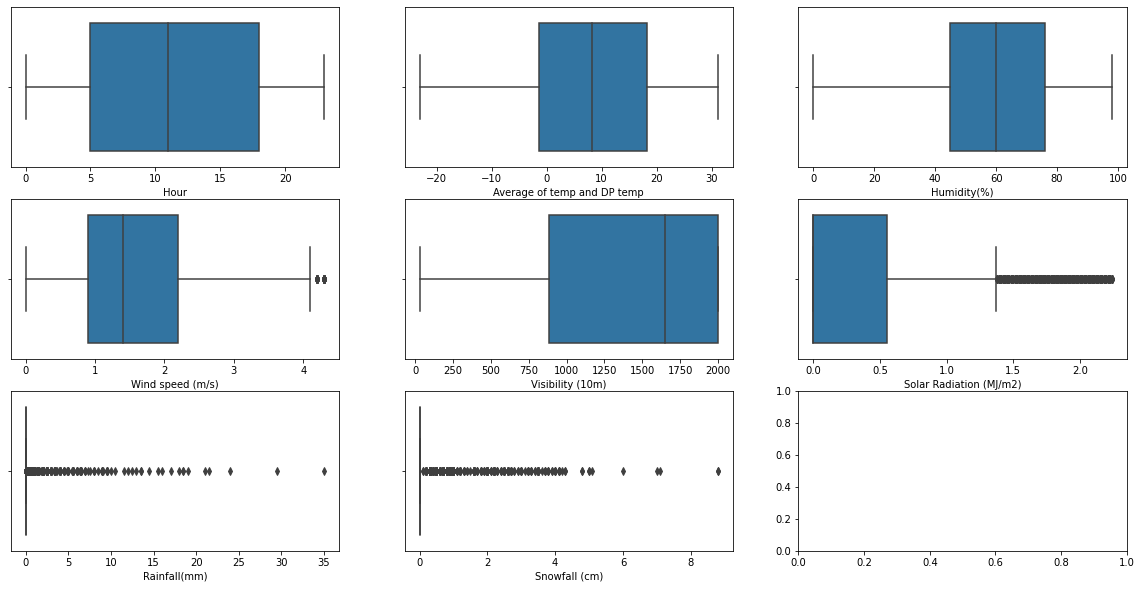

In [ ]:
#Now lets observe the variables after removing outliers.
fig,axes=plt.subplots(3,3,figsize=(20,10))
sns.boxplot(df['Hour'],ax=axes[0,0])
sns.boxplot(df['Average of temp and DP temp'],ax=axes[0,1])
sns.boxplot(df['Humidity(%)'],ax=axes[0,2])
sns.boxplot(df['Wind speed (m/s)'],ax=axes[1,0])
sns.boxplot(df['Visibility (10m)'],ax=axes[1,1])
sns.boxplot(df['Solar Radiation (MJ/m2)'],ax=axes[1,2])
sns.boxplot(df['Rainfall(mm)'],ax=axes[2,0])
sns.boxplot(df['Snowfall (cm)'],ax=axes[2,1])


##### What all outlier treatment techniques have you used and why did you use those techniques?

I have used the IQR method to remove outliers as it is effective and one of the most widely used techniques for outliers removal.

### 3. Categorical Encoding

In [ ]:
#Performing One Hot Encoding
holiday=pd.get_dummies(df['Holiday'],drop_first=True)
days=pd.get_dummies(df['Day of Week'],drop_first=True)
months=pd.get_dummies(df['Month'],drop_first=True)
seasons=pd.get_dummies(df['Seasons'],drop_first=True)

In [ ]:
df=pd.concat([df,seasons,days,months,holiday],axis=1)

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,...,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,No Holiday
0,2017-01-12,254,0,37,2.2,2000,0.0,0.0,0.0,Winter,...,0,1,0,0,0,0,0,0,0,1
1,2017-01-12,204,1,38,0.8,2000,0.0,0.0,0.0,Winter,...,0,1,0,0,0,0,0,0,0,1
2,2017-01-12,173,2,39,1.0,2000,0.0,0.0,0.0,Winter,...,0,1,0,0,0,0,0,0,0,1
3,2017-01-12,107,3,40,0.9,2000,0.0,0.0,0.0,Winter,...,0,1,0,0,0,0,0,0,0,1
4,2017-01-12,78,4,36,2.3,2000,0.0,0.0,0.0,Winter,...,0,1,0,0,0,0,0,0,0,1


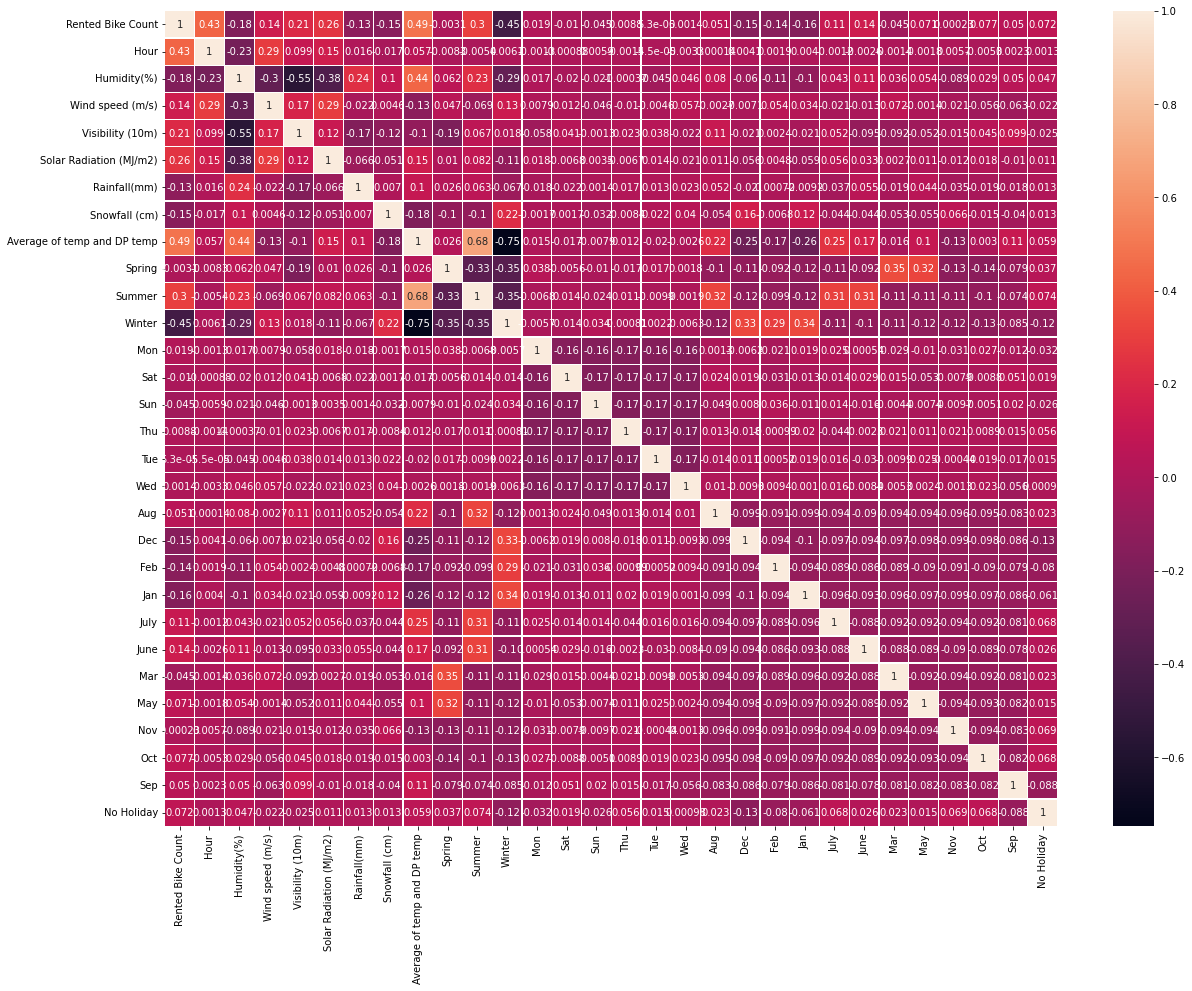

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(method='pearson'),annot=True,linewidths=0.2)

#### What all categorical encoding techniques have you used & why did you use those techniques?

I have used one hot encoding as the data did not have enough information for ordinal encoding and also One Hot encoding is one of the most widely used encoding technique.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
#Dropping some unneeded variables and some variables that have  considerably high correlation with other variables
df=df.drop(['Date','Holiday','Wind speed (m/s)','Sep','Seasons','Day of Week','Month','Visibility Category'],axis=1)



In [ ]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Humidity(%)', 'Visibility (10m)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
       'Average of temp and DP temp', 'Spring', 'Summer', 'Winter', 'Mon',
       'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'Aug', 'Dec', 'Feb', 'Jan', 'July',
       'June', 'Mar', 'May', 'Nov', 'Oct', 'No Holiday'],
      dtype='object')

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
#Define a function to observe the distribution of the variables
def diagnostic_plot(data,variable):
  
  
  plt.figure(figsize=(15,6))
  plt.subplot(1,2,1)
  data[variable].hist()
  plt.title(variable)
  
 
  plt.subplot(1,2,2)
  stats.probplot(data[variable],dist='norm',plot=plt)
  plt.show()
def plot_features(data,list):
  for i in list:
    plot=diagnostic_plot(data,i)
  return plot

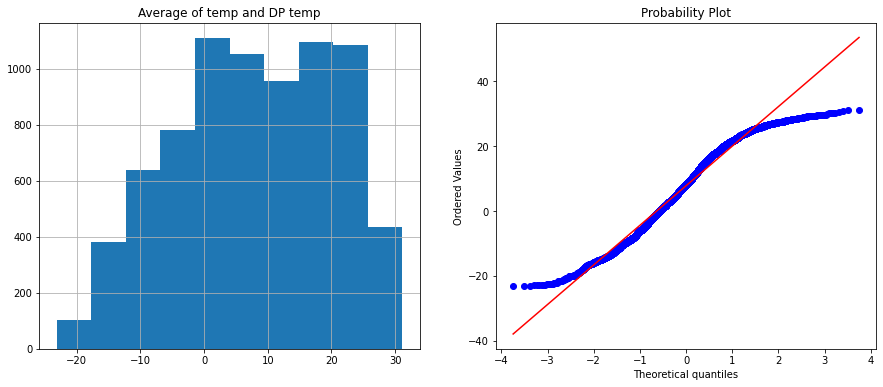

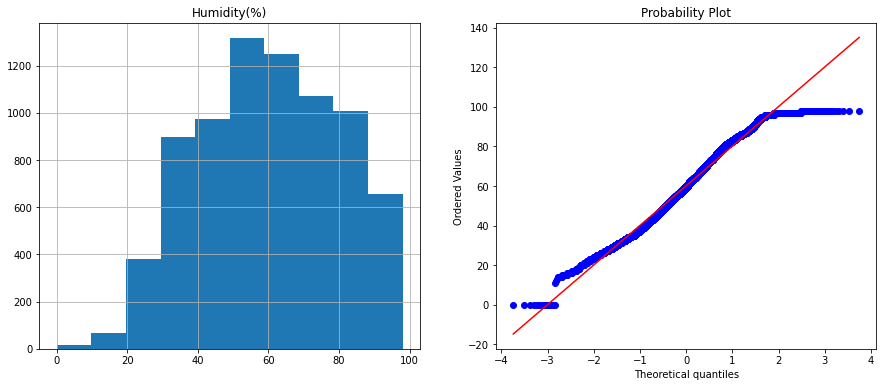

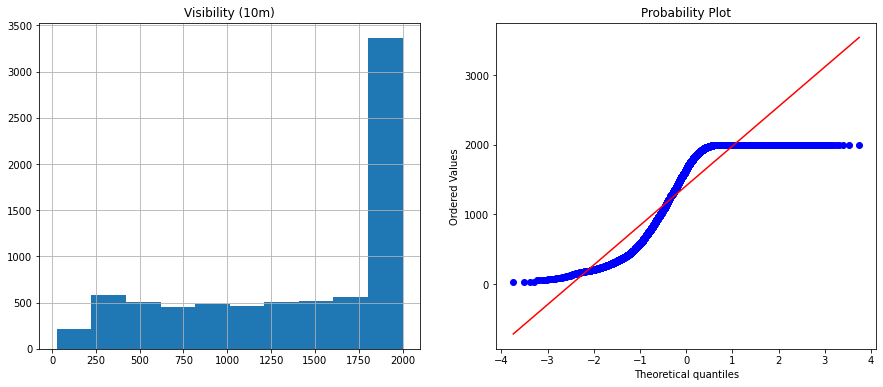

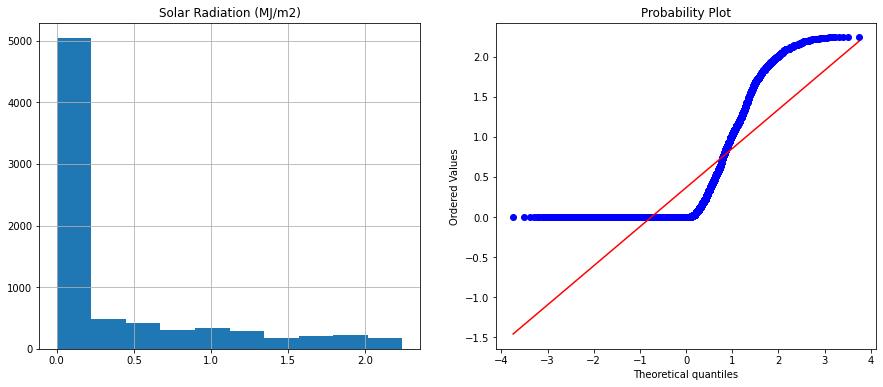

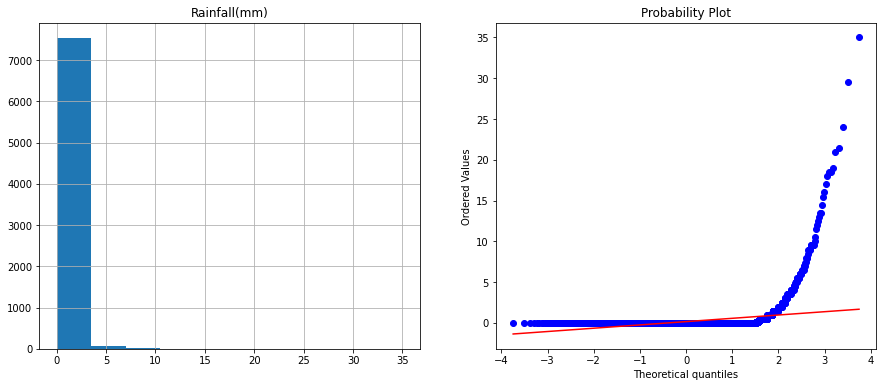

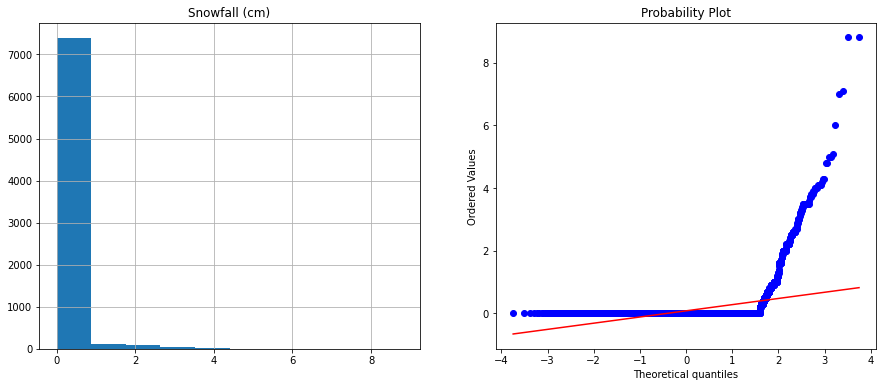

In [ ]:
feature_list=['Average of temp and DP temp','Humidity(%)','Visibility (10m)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']
plot_features(df,feature_list)

We can try to transform the data to make it close to a Gaussian Distribution.

In [ ]:
#Trying out different transformations
df1=df.copy()

In [ ]:
#Square Root Transformations
for i in feature_list:
  df1['sqrt_'+i]=(df1[i])**1/2

In [ ]:
sqrt_list=[]
for i in feature_list:
  sqrt_list.append('sqrt_'+i)
sqrt_list


['sqrt_Average of temp and DP temp',
 'sqrt_Humidity(%)',
 'sqrt_Visibility (10m)',
 'sqrt_Solar Radiation (MJ/m2)',
 'sqrt_Rainfall(mm)',
 'sqrt_Snowfall (cm)']

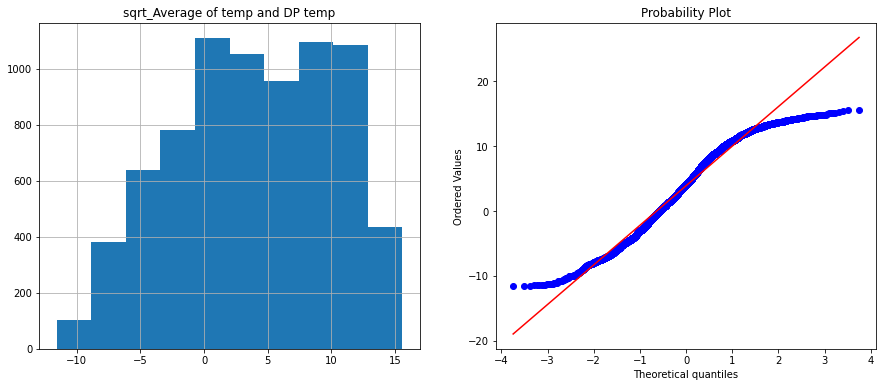

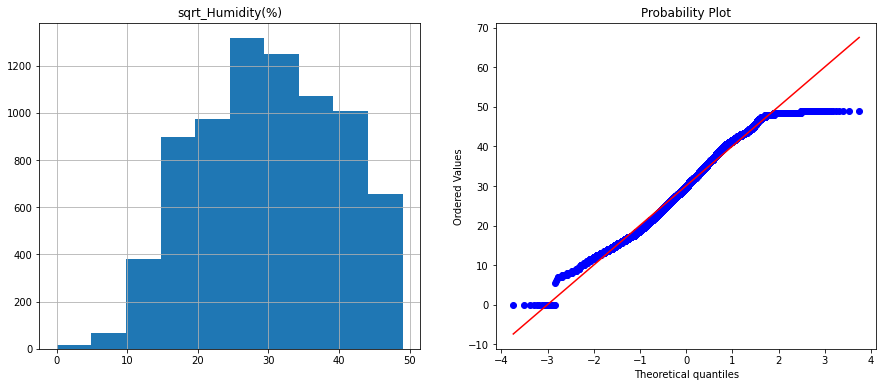

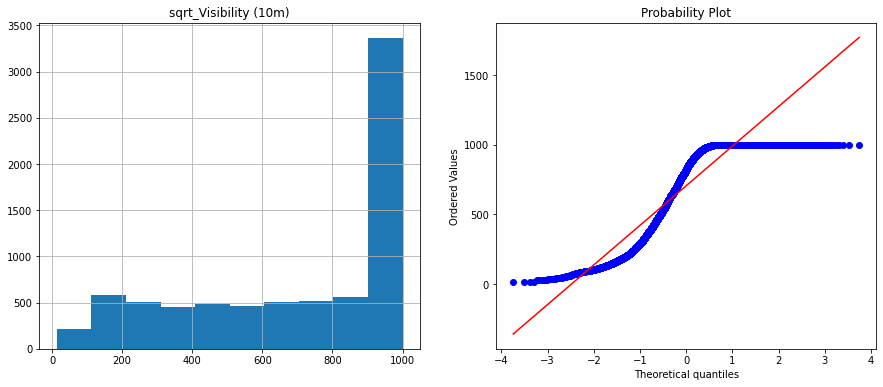

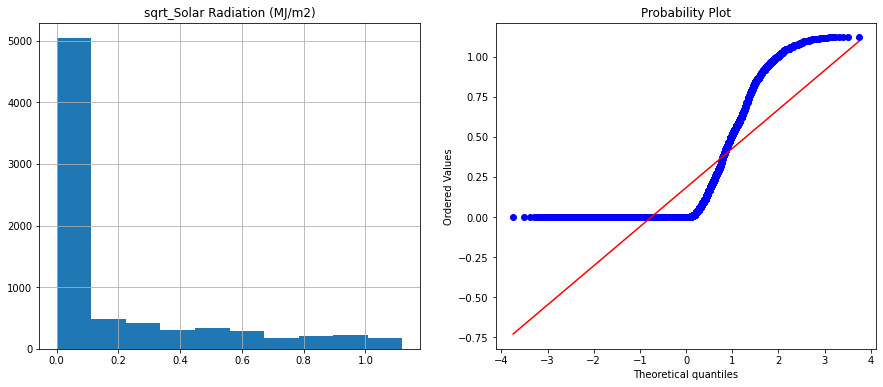

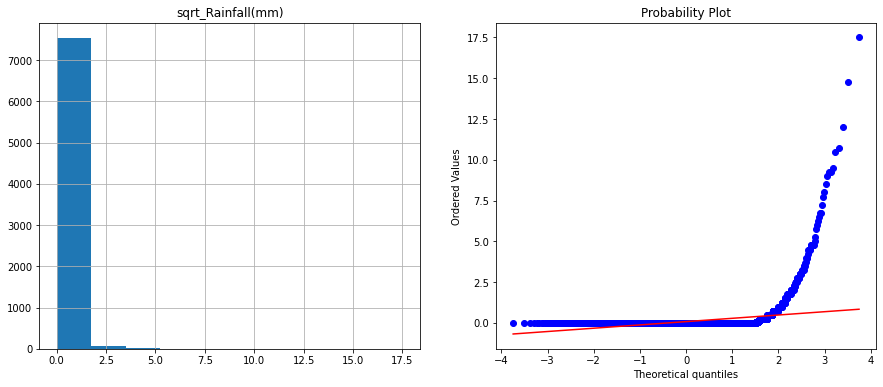

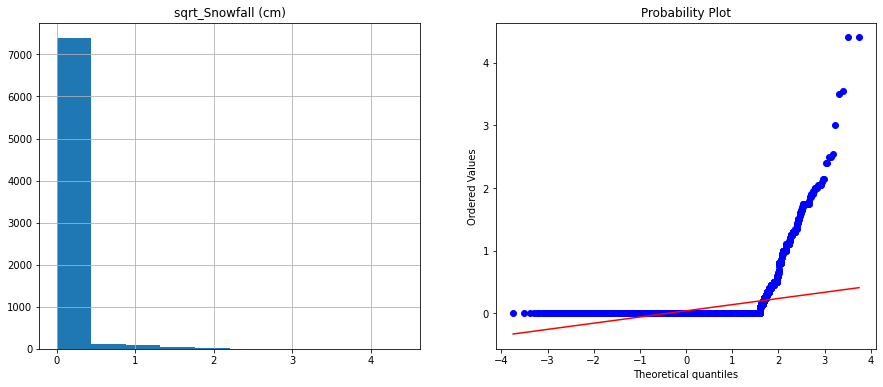

In [ ]:
plot_features(df1,sqrt_list)

In [ ]:
#Exponential Transformations
for i in feature_list:
  df1['ex_'+i]=(df1[i])**1/5

In [ ]:
ex_list=[]
for i in feature_list:
  ex_list.append('ex_'+i)
ex_list


['ex_Average of temp and DP temp',
 'ex_Humidity(%)',
 'ex_Visibility (10m)',
 'ex_Solar Radiation (MJ/m2)',
 'ex_Rainfall(mm)',
 'ex_Snowfall (cm)']

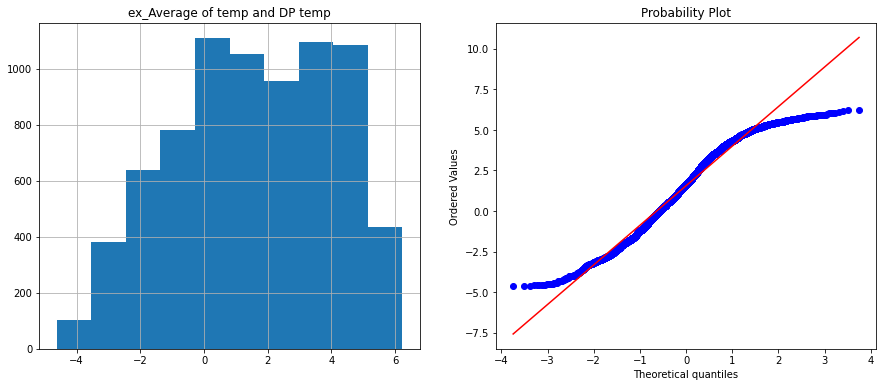

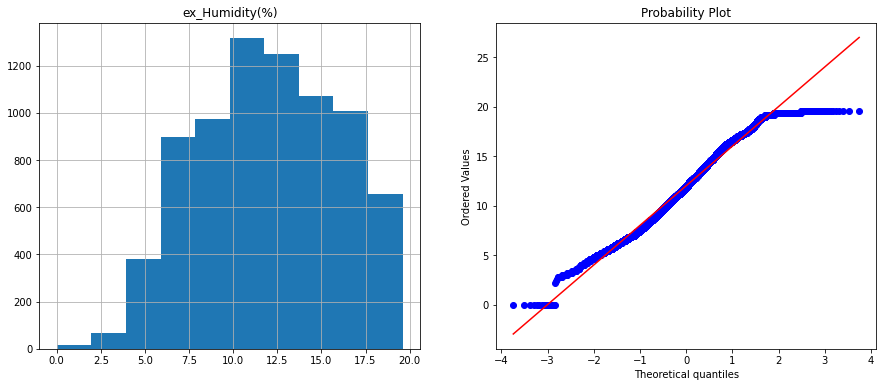

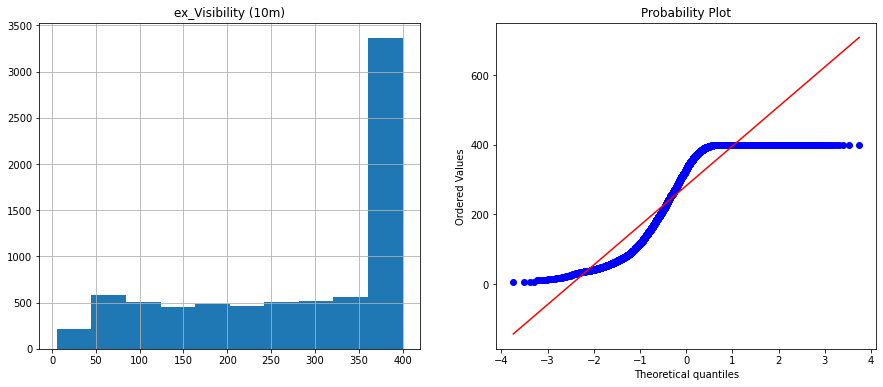

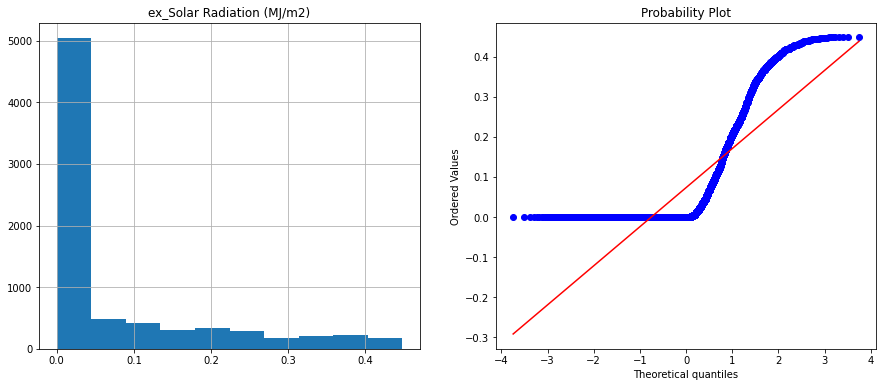

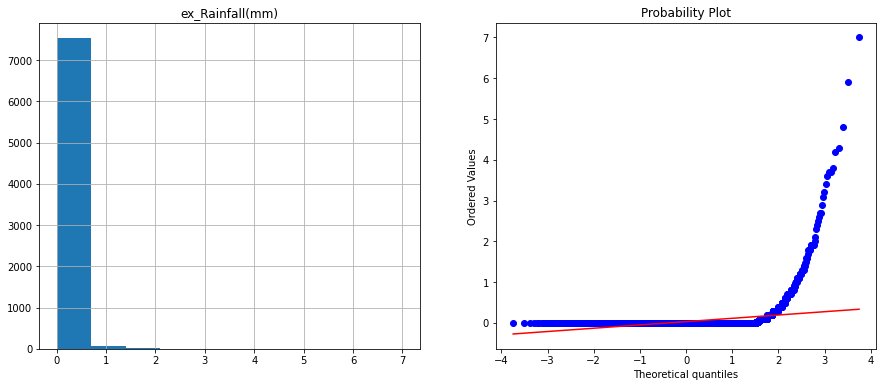

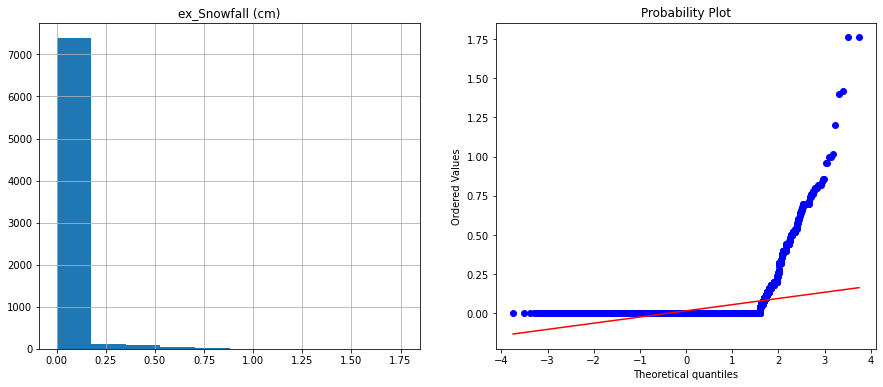

In [ ]:
plot_features(df1,ex_list)

We observe that the transformations don't change the distribution considerably. So we conclude that there is no need for any transformation in the variables.

### 6. Data Scaling

In [ ]:
# Scaling your data


##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

The dataset does not have a very large dimensions and so dimensionality reduction is not required.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

In [ ]:
#Splitting the dataset into train and test dataset
X=df.drop(['Rented Bike Count'],axis=1)
Y=df['Rented Bike Count']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)


In [ ]:
#Scaling the train and test dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


##### What data splitting ratio have you used and why? 

I have used the ideal 4:1 ratio for train and test data resoectively.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***6. ML Model Implementation***

In [ ]:
#Function for calculating Adjusted r2 scores
def adjr2_tr(y_pred_train):
  adjr2tr=1-(1-(r2(Y_train,y_pred_train))*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1))
  return adjr2tr
def adjr2_test(y_pred_test):
  adjr2test=1-(1-(r2(Y_test,y_pred_test))*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))
  return adjr2test

In [ ]:
def evaluation_metrics(y_pred_train,y_pred_test):
  #Printing train metrics
  print("TRAIN METRICS")
  print("Train r2 score: ",r2(Y_train,y_pred_train))
  print("Train MSE: ",mse(Y_train,y_pred_train))
  print("Train MAE: ",mae(Y_train,y_pred_train))
  print('Train Adjusted r2: ',adjr2_tr(y_pred_train))
  print('-'*40)
  #Printing test metrics
  print("TEST METRICS")
  print("Test r2 score: ",r2(Y_test,y_pred_test))
  print("Test MSE: ",mse(Y_test,y_pred_test))
  print("Test MAE: ",mae(Y_test,y_pred_test))
  print('Test Adjusted r2: ',adjr2_test(y_pred_test))

### ML Model - 1

## Linear Regression

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

# Predict on the model
y_pred_train_lr=lr.predict(X_train)
y_pred_test_lr=lr.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
evaluation_metrics(y_pred_train_lr,y_pred_test_lr)

TRAIN METRICS
Train r2 score:  0.5653628713573693
Train MSE:  186418.9037407349
Train MAE:  326.83178860381923
Train Adjusted r2:  0.5678727032427111
----------------------------------------
TEST METRICS
Test r2 score:  0.5696672136614418
Test MSE:  189441.29689227676
Test MAE:  326.5216914749386
Test Adjusted r2:  0.5799212235073478


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
params={
    'n_jobs':[10,20,50,100,200,500,1000]
    
}
clf_lr=HalvingGridSearchCV(lr,params,cv=5,return_train_score=False)
clf_lr.fit(X_train,Y_train)
print('best_score: ',clf_lr.best_score_)
print('best_params: ',clf_lr.best_params_)




best_score:  0.5589027967661837
best_params:  {'n_jobs': 200}


In [ ]:
# Fit the Algorithm
lrn=LinearRegression(n_jobs=200)
lrn.fit(X_train,Y_train)

# Predict on the model
y_pred_train_lrn=lrn.predict(X_train)
y_pred_test_lrn=lrn.predict(X_test)

In [ ]:
# Visualizing evaluation Metric Score chart
evaluation_metrics(y_pred_train_lrn,y_pred_test_lrn)

TRAIN METRICS
Train r2 score:  0.5653628713573693
Train MSE:  186418.9037407349
Train MAE:  326.83178860381923
Train Adjusted r2:  0.5678727032427111
----------------------------------------
TEST METRICS
Test r2 score:  0.5696672136614418
Test MSE:  189441.29689227676
Test MAE:  326.5216914749386
Test Adjusted r2:  0.5799212235073478


##### Which hyperparameter optimization technique have you used and why?

I have used Halving Grid Search CV because it is effective and faster than Grid Search CV.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No improvement was seen.

### ML Model - 2

## Decision Tree Regressor

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
from sklearn.tree import DecisionTreeRegressor
dr=DecisionTreeRegressor()
dr.fit(X_train,Y_train)

y_pred_train_dr=dr.predict(X_train)
y_pred_test_dr=dr.predict(X_test)

In [ ]:
evaluation_metrics(y_pred_train_dr,y_pred_test_dr)

TRAIN METRICS
Train r2 score:  1.0
Train MSE:  0.0
Train MAE:  0.0
Train Adjusted r2:  1.004439329168037
----------------------------------------
TEST METRICS
Test r2 score:  0.8213075182908451
Test MSE:  78664.08638743455
Test MAE:  164.95287958115182
Test Adjusted r2:  0.8360910536200804


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
params={
    
    'max_depth':[6,8,10,15,20] 
}
clf_dr=HalvingGridSearchCV(dr,params,cv=5,return_train_score=False)
clf_dr.fit(X_train,Y_train)
print('best_score: ',clf_dr.best_score_)
print('best_params: ',clf_dr.best_params_)


best_score:  0.8130619748619076
best_params:  {'max_depth': 10}


In [ ]:
# Fit the Algorithm
drn=DecisionTreeRegressor(max_depth=8)
drn.fit(X_train,Y_train)
# Predict on the model
y_pred_train_drn=drn.predict(X_train)
y_pred_test_drn=drn.predict(X_test)

In [ ]:
evaluation_metrics(y_pred_train_drn,y_pred_test_drn)

TRAIN METRICS
Train r2 score:  0.861987476965018
Train MSE:  59194.53620316129
Train MAE:  152.99961244945166
Train Adjusted r2:  0.8658141231139913
----------------------------------------
TEST METRICS
Test r2 score:  0.8100813855140505
Test MSE:  83606.05971560135
Test MAE:  179.61861717324504
Test Adjusted r2:  0.8246628504533033


##### Which hyperparameter optimization technique have you used and why?

I have used Halving Grid Search CV because it is effective and faster than Grid Search CV.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No improvement was seen.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

### ML Model - 3

## XG Boost Regressor

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm
from xgboost import XGBRegressor
xg=XGBRegressor()
xg=xg.fit(X_train,Y_train)
# Predict on the model
y_pred_test_xg=xg.predict(X_test)
y_pred_train_xg=xg.predict(X_train)

[03:55:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
evaluation_metrics(y_pred_train_xg,y_pred_test_xg)

TRAIN METRICS
Train r2 score:  0.8640968139939205
Train MSE:  58289.826801606585
Train MAE:  162.81046729667293
Train Adjusted r2:  0.8679328241842914
----------------------------------------
TEST METRICS
Test r2 score:  0.8596750818825655
Test MSE:  61773.89991743574
Test MAE:  170.14179263907576
Test Adjusted r2:  0.8751492333564517


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
params={
    'n_estimators':[500,1000,1500,2000],
    'max_depth':[6,8,10,15,20],
    'learning_rate':[1e-4,1e-3,1e-2,0.1,0.3,1],
    'objective':['reg:squarederror']
}
clf_xgb=HalvingGridSearchCV(xg,params,cv=5,return_train_score=False)
clf_xgb.fit(X_train,Y_train)
print('best_score: ',clf_xgb.best_score_)
print('best_params: ',clf_xgb.best_params_)




KeyboardInterrupt: ignored

In [ ]:
# Fit the Algorithm
xgb=XGBRegressor(n_estimators=5000,objective='reg:squarederror',max_depth=8,learning_rate=0.01)

xgb=xgb.fit(X_train,Y_train)
# Predict on the model
y_pred_test_xgb=xgb.predict(X_test)
y_pred_train_xgb=xgb.predict(X_train)

In [ ]:
evaluation_metrics(y_pred_train_xgb,y_pred_test_xgb)

##### Which hyperparameter optimization technique have you used and why?

I have used Halving Grid Search CV because it is effective and faster than Grid Search CV.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Improvement can be seen in all aspects. All the evaluation metric scores have imrpoved and can be seen from the evaluation chart.

## Ridge Regression

In [ ]:

from sklearn.linear_model import Ridge
rd_=Ridge()
rd_=rd_.fit(X_train,Y_train)
y_pred_test_rd_=rd_.predict(X_test)
y_pred_train_rd_=rd_.predict(X_train)

In [ ]:
evaluation_metrics(y_pred_train_rd_,y_pred_test_rd_)

### Hyperparameter tuning

In [ ]:
params={
    'alpha':[0.5,0.1,0.01,0.001,0.0001],
    'solver':['svd','lsqr','saga'],
    'max_iter':[100,200,300,1000,2000,5000]
  
    
}
clf_rd=HalvingGridSearchCV(rd_,params,cv=5,return_train_score=False)
clf_rd.fit(X_train,Y_train)
print('best_score: ',clf_rd.best_score_)
print('best_params: ',clf_rd.best_params_)


In [ ]:
rd=Ridge(alpha=0.5,max_iter=1000,solver='saga')
rd.fit(X_train,Y_train)

In [ ]:
y_pred_train_rd=rd.predict(X_train)
y_pred_test_rd=rd.predict(X_test)

### Evaluation

In [ ]:
evaluation_metrics(y_pred_train_rd,y_pred_test_rd)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfr=RandomForestRegressor(n_estimators=1000,max_depth=30)
rfr.fit(X_train,Y_train)
rfr.score(X_test,Y_test)

In [ ]:
y_pred_train_rf=rfr.predict(X_train)
y_pred_test_rf=rfr.predict(X_test)

### Evaluation

In [ ]:
evaluation_metrics(y_pred_train_rf,y_pred_test_rf)

# Summary of the model performances

In [ ]:
#Creating a dataframe of all the model performances to choose the optimum model
train_scores=pd.DataFrame({'Model':['Linear Regression','Decision Tree Regressor','XGBoost Regressor','Ridge Regression','Random Forest Regressor'],
                           'r2 scores':[r2(Y_train,y_pred_train_lr),r2(Y_train,y_pred_train_dr),r2(Y_train,y_pred_train_xgb),r2(Y_train,y_pred_train_rd),r2(Y_train,y_pred_train_rf)],
                           'MSE':[mse(Y_train,y_pred_train_lr),mse(Y_train,y_pred_train_dr),mse(Y_train,y_pred_train_xgb),mse(Y_train,y_pred_train_rd),mse(Y_train,y_pred_train_rf)],
                           'MAE':[mae(Y_train,y_pred_train_lr),mae(Y_train,y_pred_train_dr),mae(Y_train,y_pred_train_xgb),mae(Y_train,y_pred_train_rd),mae(Y_train,y_pred_train_rf)],
                           'Adjusted R2 Score':[adjr2_tr(y_pred_train_lr),adjr2_tr(y_pred_train_dr),adjr2_tr(y_pred_train_xgb),adjr2_tr(y_pred_train_rd),adjr2_tr(y_pred_train_rf)]
                                        })

In [ ]:
train_scores

In [ ]:
test_scores=pd.DataFrame({'Model':['Linear Regression','Decision Tree Regressor','XGBoost Regressor','Ridge Regression','Random Forest Regressor'],
                           'r2 scores':[r2(Y_test,y_pred_test_lr),r2(Y_test,y_pred_test_dr),r2(Y_test,y_pred_test_xgb),r2(Y_test,y_pred_test_rd),r2(Y_test,y_pred_test_rf)],
                           'MSE':[mse(Y_test,y_pred_test_lr),mse(Y_test,y_pred_test_dr),mse(Y_test,y_pred_test_xgb),mse(Y_test,y_pred_test_rd),mse(Y_test,y_pred_test_rf)],
                           'MAE':[mae(Y_test,y_pred_test_lr),mae(Y_test,y_pred_test_dr),mae(Y_test,y_pred_test_xgb),mae(Y_test,y_pred_test_rd),mae(Y_test,y_pred_test_rf)],
                           'Adjusted R2 Score':[adjr2_test(y_pred_test_lr),adjr2_test(y_pred_test_dr),adjr2_test(y_pred_test_xgb),adjr2_test(y_pred_test_rd),adjr2_test(y_pred_test_rf)]
                                        })

In [ ]:
test_scores

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

R2 and Adjusted R2 score are optimal metrics for our problem statement

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We see that among all the models, XGBoost Regressor has the best scores with an r2 score of 0.924 and adjusted r2 score of 0.94 on the test dataset. Thus we choose XG Boost to be our optimum model.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
def plot_importance(model, features,num=len(X_train),save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_ , 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    


plot_importance(xgb,X)

## ***7.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

**EDA Conclusions**

• Thus customers do not like to rent a bike when it is too cold outside.

• More bikes are rented when there is no rainfall.

• More bikes are rented when there is no snowfall.

• More bikes are rented when there is less humidity.

• Highest number of bikes is rented in Summer and the lowest in winter.

• The highest number of bikes are rented in Thursday and the lowest on Sunday.

• The highest number of bikes are rented in June and the lowest in February.

• Most of the bikes are rented when there is no holiday.

• All the bikes are rented on functioning days.



**Model Conclusions**

• Linear Regression and Ridge Regression did not give us satisfactory results. They 
performed bad on both train and test data.

• Decision Tree Regressor performed very well on train data but not so well on test data. 
This suggests that the model was overfitting on the train data.

• XG Boost Regressor and Random Forest Regressor performed well on both the train 
and test data. But out of the two, XG Boost performed better. It gave us an Adjusted R2 
score of 0.94 which is very good.

• So we chose XG Boost regressor as the optimum model for our problem.





### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***